In [15]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns

## Load models and define prediction function

In [16]:
loaded_class_model = tf.keras.models.load_model(r"C:\Users\amoge\projects\main_app-main\ann_folder\ml_models\ann-c_model.h5")
loaded_reg_model = tf.keras.models.load_model(r"C:\Users\amoge\projects\main_app-main\ann_folder\ml_models\ann-r_model.h5")

In [42]:
classes = ['very low contamination', 
           'low contamination', 
           'moderate contamination', 
           'high contamination', 
           'very high contamination', 
           'extremely high contamination', 
           'ultra-high contamination']


class_encoder = LabelEncoder()
encoded_classes = class_encoder.fit_transform(classes)
print(encoded_classes)

label_mapping = {'very low contamination': 6, 
           'low contamination': 2 , 
           'moderate contamination': 3, 
           'high contamination': 1, 
           'very high contamination': 5, 
           'extremely high contamination': 0, 
           'ultra-high contamination': 4}

[6 2 3 1 5 0 4]


In [57]:

def make_class_predictions(X_set, y_set):
    
    
    y_predicted = loaded_class_model.predict(X_set)
    y_predicted_classes = np.argmax(y_predicted, axis=1)
    decoded_predicted_classes = class_encoder.inverse_transform(y_predicted_classes)
    accuracy = accuracy_score(y_set, y_predicted_classes)
    report = classification_report(y_set, y_predicted_classes, zero_division=np.nan)
    

    
    return y_set, y_predicted_classes, decoded_predicted_classes, accuracy, report


def make_reg_predict(test_set, actual_values):
    predictions = loaded_reg_model.predict(test_set).flatten()
    prediction_plot = plt.scatter(actual_values, predictions)
    plt.xlabel('actual')
    plt.ylabel('ylabel')
    accuracy_reg = r2_score(actual_values, predictions)
    mse = mean_squared_error(actual_values, predictions)
    mae = mean_absolute_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    
    return predictions, prediction_plot, accuracy_reg, mse, mae, rmse

## Define calculation function

In [19]:
def determine_contamination_degree(dataset):
    fCd = []
    fCr = []
    fNi = []
    fPb = []
    fZn = []
    fCu = []
    fCo = []
    fDeg = []
    fDeg_class = []

    for i in dataset:
        #print(dataset[i])
        for x in dataset[i]:
            #print(x)
            if i == 'Cd (mg/kg)':
                f_value = x/7.5
                #print(f_value)
                fCd.append(f_value)

            elif i == 'Cr (mg/kg)':
                f_value = x/6.5
                fCr.append(f_value)

            elif i == 'Ni (mg/kg)':
                f_value = x/91
                fNi.append(f_value)

            elif i == 'Pb (mg/kg)':
                f_value = x/20
                fPb.append(f_value)

            elif i == 'Zn (mg/kg)':
                f_value = x/240
                fZn.append(f_value)

            elif i == 'Cu (mg/kg)':
                f_value = x/16
                fCu.append(f_value)

            elif i == 'Co (mg/kg)':
                f_value = x/300
                fCo.append(f_value)

    #print(fCd)
    dataset['fCd'] = pd.Series(fCd)
    dataset['fCr'] = pd.Series(fCr)
    dataset['fNi'] = pd.Series(fNi)
    dataset['fPb'] = pd.Series(fPb)
    dataset['fZn'] = pd.Series(fZn)
    dataset['fCu'] = pd.Series(fCu)
    dataset['fCo'] = pd.Series(fCo)


   # dataset.loc[2]
    #len(dataset)
    factors = dataset.iloc[:, 9:]
    #int(factors)

    for r in range(len(factors)):
        value = factors.loc[r].values
        f_value = sum(value)/7
       #print(f_value)
        fDeg.append(f_value)
        #rint(value)
    dataset['fDeg'] = pd.Series(fDeg)
    
    for f in dataset['fDeg']:
        if f < 1.5:
            f_class = 'very low contamination'
            
        elif 1.5 < f and f <= 2:
            f_class = 'low contamination'
            
        elif 2 < f and f <= 4:
            f_class = 'moderate contamination'
            
        elif 4 < f and f <= 8:
            f_class = 'high contamination'
        
        elif 8 < f and f <= 16:
            f_class = 'very high contamination'
        
        elif 16 < f and f <= 32:
            f_class = 'extremely high contamination'
            
        elif f > 32:
            f_class = 'ultra-high contamination'
            
        fDeg_class.append(f_class)
    dataset['fDeg_class'] = pd.Series(fDeg_class)
    
    return dataset

## Load testing data

### GLOBAL DATA

In [43]:

data2 = pd.read_excel(r"C:\Users\amoge\Documents\Soil dataset_2.xlsx")
global_data = determine_contamination_degree(data2)


X_global = global_data.iloc[:, 2:9].values
y_global = global_data.iloc[:, -1].values
z_global = global_data.iloc[:, -2].values

encoded_y_global = [label_mapping[label] for label in y_global]
print(encoded_y_global)


print(y_global)

[6, 6, 6, 6, 6, 6, 6, 2, 6, 1, 3, 5, 2, 3, 2, 3, 2, 2, 6, 3]
['very low contamination' 'very low contamination'
 'very low contamination' 'very low contamination'
 'very low contamination' 'very low contamination'
 'very low contamination' 'low contamination' 'very low contamination'
 'high contamination' 'moderate contamination' 'very high contamination'
 'low contamination' 'moderate contamination' 'low contamination'
 'moderate contamination' 'low contamination' 'low contamination'
 'very low contamination' 'moderate contamination']


### SA DATA

In [21]:
data3 = pd.read_excel(r"C:\Users\amoge\Documents\soil_dataset_3.xlsx")
sa_data = determine_contamination_degree(data3)


X_sa = sa_data.iloc[:, 2:9].values
y_sa = sa_data.iloc[:, -1].values
z_sa = sa_data.iloc[:, -2].values

encoded_y_sa = [label_mapping[label] for label in y_sa]
print(encoded_y_sa)

[6, 3, 3, 3, 2, 1, 3, 3, 1, 3, 3, 6, 6, 5, 6, 0, 3, 3, 6, 2, 3, 1, 6, 6, 6, 2, 5, 1, 3, 3, 3, 0, 3]


# CLASSIFICATION

## Make predictions

### Global data

1/1 [==============================] - 0s 95ms/step
[6, 6, 6, 6, 6, 6, 6, 2, 6, 1, 3, 5, 2, 3, 2, 3, 2, 2, 6, 3]
-----------------------------------------------------------------------------------------------------------------------------------
[6 6 6 6 6 6 6 6 6 3 6 3 6 3 6 6 6 6 6 3]
-------------------------------------------------
0.55
              precision    recall  f1-score   support

           1        nan      0.00       nan         1
           2        nan      0.00       nan         5
           3       0.50      0.50      0.50         4
           5        nan      0.00       nan         1
           6       0.56      1.00      0.72         9

    accuracy                           0.55        20
   macro avg       0.53      0.30      0.61        20
weighted avg       0.54      0.55      0.65        20



Text(0, 0.5, 'ylabel')

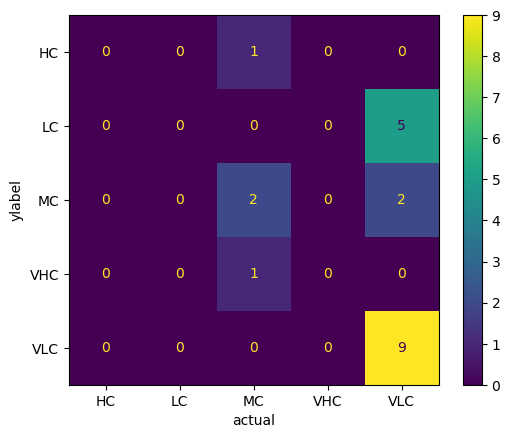

In [58]:
y_set_g, y_predicted_classes_g, decoded_predicted_classes_g, accuracy_g, report_g = make_class_predictions(X_global, encoded_y_global)
print(y_set_g)
print('-----------------------------------------------------------------------------------------------------------------------------------')
print(y_predicted_classes_g) 
print('-------------------------------------------------')
print(accuracy_g)
print(report_g)

confusion = confusion_matrix(y_set_g, y_predicted_classes_g)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['HC', 'LC', 'MC', 'VHC', 'VLC'])
confusion_diagram = cm_display.plot()
plt.xlabel('actual')
plt.ylabel('ylabel')



### SA data

2/2 [==============================] - 0s 8ms/step
0.6666666666666666
-----------------------------------------------------------------------------------------------------------------------------------
[6 3 3 6 2 3 3 3 3 3 3 6 6 3 6 3 3 3 6 6 3 3 6 6 6 6 3 3 3 3 3 3 3]
-------------------------------------------------
[6, 3, 3, 3, 2, 1, 3, 3, 1, 3, 3, 6, 6, 5, 6, 0, 3, 3, 6, 2, 3, 1, 6, 6, 6, 2, 5, 1, 3, 3, 3, 0, 3]
              precision    recall  f1-score   support

           0        nan      0.00       nan         2
           1        nan      0.00       nan         4
           2       1.00      0.33      0.50         3
           3       0.62      0.93      0.74        14
           5        nan      0.00       nan         2
           6       0.73      1.00      0.84         8

    accuracy                           0.67        33
   macro avg       0.78      0.38      0.69        33
weighted avg       0.70      0.67      0.75        33



Text(0, 0.5, 'ylabel')

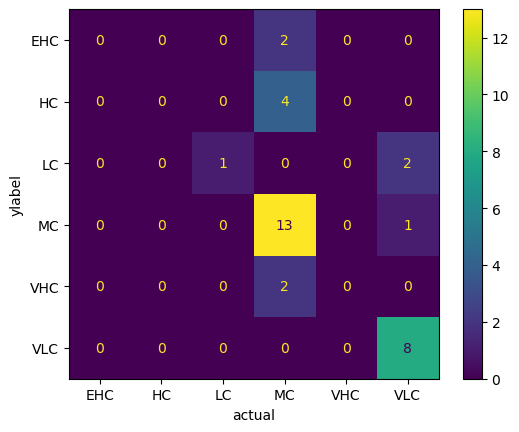

In [59]:
y_set_sa, y_predicted_classes_sa, decoded_predicted_classes_sa, accuracy_sa, report_sa = make_class_predictions(X_sa, encoded_y_sa)
print(accuracy_sa)
print('-----------------------------------------------------------------------------------------------------------------------------------')
print(y_predicted_classes_sa) 
print('-------------------------------------------------')
print(y_set_sa)
print(report_sa)

confusion_SA = confusion_matrix(y_set_sa, y_predicted_classes_sa)

cm_display_SA = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_SA, display_labels = ['EHC', 'HC', 'LC', 'MC', 'VHC', 'VLC'])
confusion_diagram = cm_display_SA.plot()
plt.xlabel('actual')
plt.ylabel('ylabel')



# REGRESSION

## Make predictions

### Global data

1/1 [==============================] - 0s 59ms/step
[0.46377683 0.51544625 0.39570755 0.40965033 0.532907   0.4381463
 0.5068915  0.66391623 0.4170127  2.5582094  4.5296474  5.840031
 1.2584773  1.0543096  1.107781   1.3060254  1.0786861  1.1434301
 1.001733   1.6851339 ]


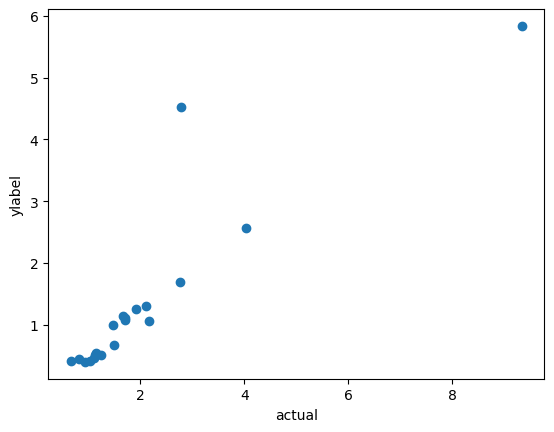

In [62]:
predictions_g, prediction_plot_g, accuracy_reg, mse_g, mae_g, rmse_g = make_reg_predict(X_global, z_global)
print(predictions_g)

### SA data

2/2 [==============================] - 0s 4ms/step
[ 1.1341157   1.583256    2.1066246   3.7473123   1.4279623   3.438025
  2.4387016   1.8673093   3.8519998   2.5450132   1.7875497   1.0472851
  0.3687524   8.471985    0.9206691  23.865728    2.6490989   1.4608369
  0.74153924  1.0766653   2.0559156   3.5294282   0.39961213  0.77062213
  0.8064097   0.88394856  7.6188655   4.9144535   2.0092852   2.1985505
  2.0968773   8.842818    1.8951359 ]
['very low contamination' 'moderate contamination'
 'moderate contamination' 'moderate contamination' 'low contamination'
 'high contamination' 'moderate contamination' 'moderate contamination'
 'high contamination' 'moderate contamination' 'moderate contamination'
 'very low contamination' 'very low contamination'
 'very high contamination' 'very low contamination'
 'extremely high contamination' 'moderate contamination'
 'moderate contamination' 'very low contamination' 'low contamination'
 'moderate contamination' 'high contamination' 'very l

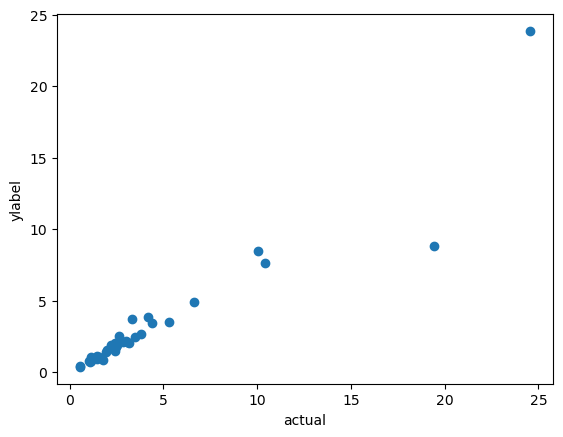

In [103]:
predictions_sa, prediction_plot_sa, accuracy_reg_sa, mse_sa, mae_sa, rmse_sa = make_reg_predict(X_sa, z_sa)
print(predictions_sa)
print()


## Convert regression results to classification

In [95]:

def convert_reg_to_class(predictions): 
    converted_results = []   
    for result in predictions:
        if result < 1.5:
            f_class = 'very low contamination'
                
        elif 1.5 < result and result <= 2:
            f_class = 'low contamination'
                
        elif 2 < result and result <= 4:
                f_class = 'moderate contamination'
                
        elif 4 < result and result <= 8:
            f_class = 'high contamination'
            
        elif 8 < result and result <= 16:
            f_class = 'very high contamination'
            
        elif 16 < result and result <= 32:
            f_class = 'extremely high contamination'
                
        elif result > 32:
            f_class = 'ultra-high contamination'
            
        converted_results.append(f_class)
    return converted_results
            


0.45
              precision    recall  f1-score   support

           1       0.00      0.00       nan         1
           2       0.00      0.00       nan         5
           3       0.00      0.00       nan         4
           5        nan      0.00       nan         1
           6       0.56      1.00      0.72         9

    accuracy                           0.45        20
   macro avg       0.14      0.20      0.72        20
weighted avg       0.27      0.45      0.72        20

[6, 6, 6, 6, 6, 6, 6, 2, 6, 1, 3, 5, 2, 3, 2, 3, 2, 2, 6, 3]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 1, 1, 6, 6, 6, 6, 6, 6, 6, 2]


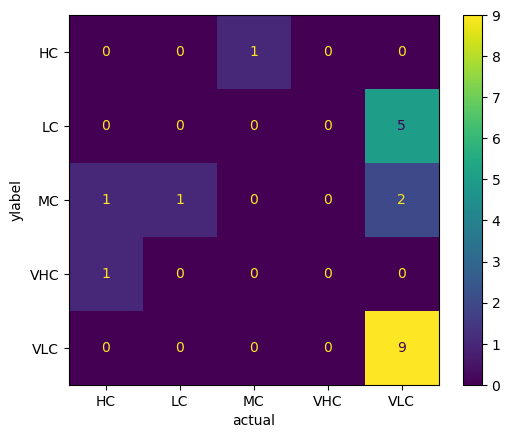

In [113]:
global_converted = convert_reg_to_class(predictions_g)
encoded_global_converted = [label_mapping[label] for label in global_converted]
accuracy_converted_g = accuracy_score(encoded_y_global, encoded_global_converted)
report_converted_g = classification_report(encoded_y_global, encoded_global_converted, zero_division=np.nan)
print(accuracy_converted_g)
print(report_converted_g)
confusion_converted_g = confusion_matrix(encoded_y_global, encoded_global_converted)
cm_display_converted_g = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_converted_g, display_labels = ['HC', 'LC', 'MC', 'VHC', 'VLC'])
confusion_diagram = cm_display_converted_g.plot()
plt.xlabel('actual')
plt.ylabel('ylabel')

print(encoded_y_global)
print(encoded_global_converted)

0.6060606060606061
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.25      0.33         4
           2       0.00      0.00       nan         3
           3       0.75      0.64      0.69        14
           5       0.50      0.50      0.50         2
           6       0.67      1.00      0.80         8

    accuracy                           0.61        33
   macro avg       0.57      0.48      0.60        33
weighted avg       0.63      0.61      0.66        33

[6, 3, 3, 3, 2, 1, 3, 3, 1, 3, 3, 6, 6, 5, 6, 0, 3, 3, 6, 2, 3, 1, 6, 6, 6, 2, 5, 1, 3, 3, 3, 0, 3]
[6, 2, 3, 3, 6, 3, 3, 2, 3, 3, 2, 6, 6, 5, 6, 0, 3, 6, 6, 6, 3, 3, 6, 6, 6, 6, 1, 1, 3, 3, 3, 5, 2]


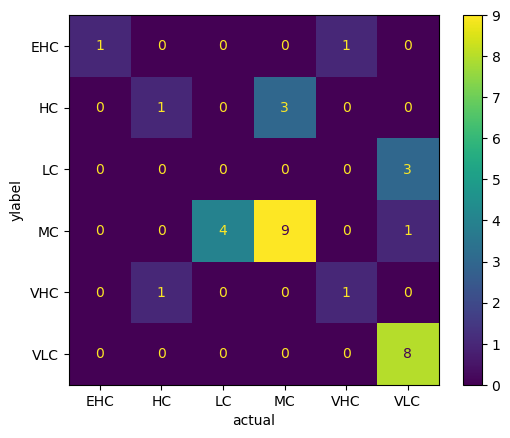

In [112]:
sa_converted = convert_reg_to_class(predictions_sa)
encoded_sa_converted = [label_mapping[label] for label in sa_converted]
accuracy_converted_sa = accuracy_score(encoded_y_sa, encoded_sa_converted)
report_converted_sa = classification_report(encoded_y_sa, encoded_sa_converted, zero_division=np.nan)
print(accuracy_converted_sa)
print(report_converted_sa)

confusion_converted_sa = confusion_matrix(encoded_y_sa, encoded_sa_converted)
cm_display_converted_sa = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_converted_sa, display_labels = ['EHC', 'HC', 'LC', 'MC', 'VHC', 'VLC'])
confusion_diagram = cm_display_converted_sa.plot()
plt.xlabel('actual')
plt.ylabel('ylabel')

print(encoded_y_sa)
print(encoded_sa_converted)